In [4]:
# author: René Kopeinig
# script: Compare and display cryptocurrency data
# description: Retrieve, compare and display Time-Series data of crypto currencies from Quandl.
#              This tutorial will show you a few basics how to handle 
#              Time-Series data using Pandas DataFrame

In [5]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [6]:
# Import dependencies
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *

In [7]:
import statsmodels.api as sm
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [8]:
# Get data from Quandl
# What is Quandl? It is a marketplace for financial, economic and alternative data 
# delivered in modern formats for today's analysts, including Python.

def get_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    print cache_path
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [9]:
# Call function and retrieve data
bitfinex_eth_btc = get_data('BITFINEX/ETHBTC')

BITFINEX-ETHBTC.pkl
Loaded BITFINEX/ETHBTC from cache


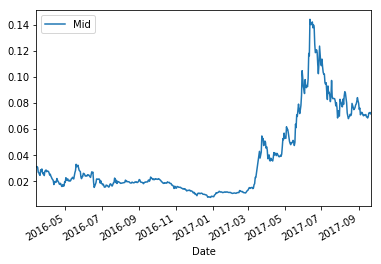

In [10]:
# Display Time-Series data price of Ethereum in Bitcoin
bitfinex_eth_btc.plot(y=['Mid'])
plt.show()

In [11]:
# So everyone is interested in Bitcoin, lets focus on Ethereum
# Data comes from https://www.quandl.com/data/GDAX-GDAX-Global-Digital-Asset-Exchange
gdax_eth_eur = get_data('GDAX/ETH_EUR')
plt.show()

GDAX-ETH_EUR.pkl
Loaded GDAX/ETH_EUR from cache


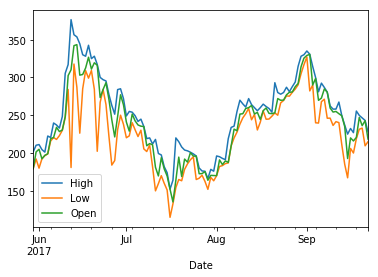

In [12]:
# Display daily open, low and high prices of ETH
gdax_eth_eur.plot(y=['High','Low', 'Open'])
plt.show()

In [13]:
# Display the same thing but way more fancy with Python graphing library Plotly
# Check out https://plot.ly/python/

eth_open = go.Scatter(x=gdax_eth_eur.index, y=gdax_eth_eur['Open'], name='Open')
eth_low = go.Scatter(x=gdax_eth_eur.index, y=gdax_eth_eur['Low'], name='Low')
eth_high = go.Scatter(x=gdax_eth_eur.index, y=gdax_eth_eur['High'], name='High')

data=[eth_open,eth_low, eth_high]

layout = dict(title = 'Ethereum-Euro Chart',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig)

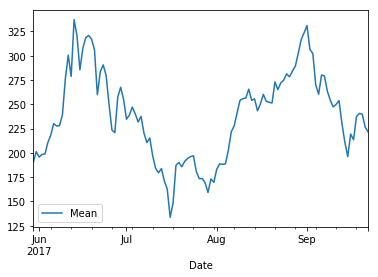

In [14]:
# Display daily average of ETH
gdax_eth_eur['Mean'] = (gdax_eth_eur['High']+gdax_eth_eur['Low'])/2
gdax_eth_eur.plot(y=['Mean'])
plt.show()

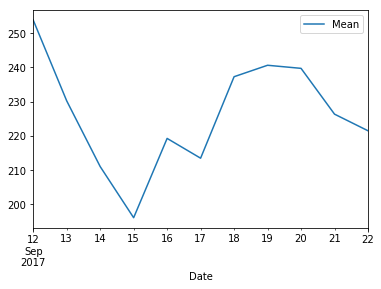

In [15]:
# You also can use the index to display any given time range.
gdax_eth_eur['2017-09-12':'2017-09-22'].plot(y='Mean')
plt.show()

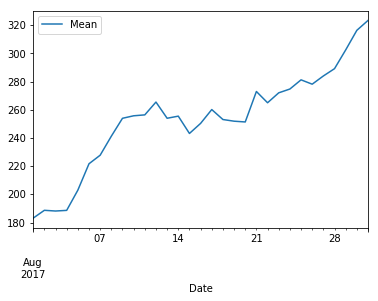

In [16]:
# Or one specific month
gdax_eth_eur['2017-08'].plot(y='Mean')
plt.show()

In [17]:
# Retrieve all data where ETH was higher than 300 Euro
gdax_eth_eur[gdax_eth_eur['Mean']>300]

,Open,High,Low,Volume,Mean
Date,,,,,
2017-06-11,302.40,317.00,284.07,8554.631337,300.535
2017-06-13,342.00,356.43,317.68,4150.800214,337.055
2017-06-14,343.34,353.58,287.09,10276.812128,320.335
2017-06-16,303.88,329.99,285.00,5764.312765,307.495
2017-06-17,312.45,328.00,309.00,3397.123550,318.500
2017-06-18,326.67,342.50,299.04,6955.302412,320.770
2017-06-19,311.00,324.84,309.14,2033.671141,316.990
2017-06-20,319.33,328.03,284.25,6809.697387,306.140
2017-08-29,291.99,314.75,290.24,7669.576612,302.495


In [18]:
# Describe function shows all statistical information at once
gdax_eth_eur.describe()

,Open,High,Low,Volume,Mean
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,240.158621,252.794828,224.037586,7445.263227,238.416207
std,47.631575,48.591138,45.404244,6551.073066,45.295391
min,135.380000,152.260000,115.000000,563.574044,133.630000
25%,198.500000,217.250000,185.917500,3129.189899,198.071250
50%,243.375000,254.000000,224.640000,5560.806856,239.887500
75%,272.192500,284.165000,251.260000,10039.579453,270.476250
max,343.340000,376.390000,327.000000,34035.448657,337.055000


In [19]:
# Correlation coefficient for each field
gdax_eth_eur.corr()

,Open,High,Low,Volume,Mean
Open,1.000000,0.964101,0.902210,-0.107260,0.969314
High,0.964101,1.000000,0.857576,0.010464,0.966199
Low,0.902210,0.857576,1.000000,-0.327776,0.961189
Volume,-0.107260,0.010464,-0.327776,1.000000,-0.158669
Mean,0.969314,0.966199,0.961189,-0.158669,1.000000
